<a href="https://colab.research.google.com/github/Sayed-Ali-Raza-Naqvi/DEP_Image_Classification_Project/blob/main/DEP_Image_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [35]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [36]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(train_images)

In [37]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [40]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [44]:
batch_size = 64
epochs = 10

history = model.fit(datagen.flow(train_images, train_labels, batch_size=batch_size),
                    epochs=epochs, validation_data=(test_images, test_labels),
                    callbacks=[early_stopping])

Epoch 1/10
782/782 [==============================] - 237s 303ms/step - loss: 0.5702 - accuracy: 0.8016 - val_loss: 0.6381 - val_accuracy: 0.7943
Epoch 2/10
782/782 [==============================] - 240s 307ms/step - loss: 0.5703 - accuracy: 0.8030 - val_loss: 0.5450 - val_accuracy: 0.8155
Epoch 3/10
782/782 [==============================] - 239s 306ms/step - loss: 0.5658 - accuracy: 0.8036 - val_loss: 0.5500 - val_accuracy: 0.8164
Epoch 4/10
782/782 [==============================] - 238s 304ms/step - loss: 0.5712 - accuracy: 0.8030 - val_loss: 0.6299 - val_accuracy: 0.7947
Epoch 5/10
782/782 [==============================] - 241s 308ms/step - loss: 0.5643 - accuracy: 0.8048 - val_loss: 0.5532 - val_accuracy: 0.8140
Epoch 6/10
782/782 [==============================] - 249s 318ms/step - loss: 0.5638 - accuracy: 0.8060 - val_loss: 0.5535 - val_accuracy: 0.8162
Epoch 7/10
782/782 [==============================] - 242s 309ms/step - loss: 0.5617 - accuracy: 0.8048 - val_loss: 0.5564 -

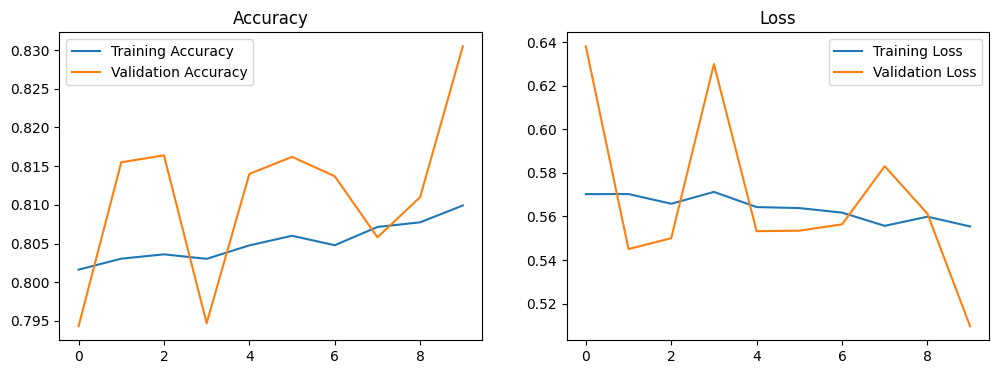

In [45]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [46]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.2f}")

313/313 [==============================] - 17s 55ms/step - loss: 0.5096 - accuracy: 0.8305
Test accuracy: 0.83


In [47]:
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

313/313 [==============================] - 11s 36ms/step


In [48]:
accuracy = np.sum(predicted_classes == true_classes) / len(true_classes)
print(f"Model accuracy on test set: {accuracy * 100:.2f}%")

Model accuracy on test set: 83.05%
